This exercise is to predict how many points NBA players scored in the 2013-2014 season using K-nearest neighbors algorithm.
The data is available at below location.
* https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0

## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score

## Load Dataset

In [3]:
#read from the csv file and return a Pandas DataFrame.
pd.options.display.float_format = '{:,.2f}'.format
    
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)

## Analyze the dataset

In [4]:
print(" [NBA Data] Length : {} ".format(len(nba)))
print(" [NBA Data] shape : {} ".format(nba.shape)) 
print(" [NBA Data] : \n", str(nba))

 [NBA Data] Length : 481 
 [NBA Data] shape : (481, 31) 
 [NBA Data] : 
                     player pos  age bref_team_id   g  gs    mp   fg   fga  \
0               Quincy Acy  SF   23          TOT  63   0   847   66   141   
1             Steven Adams   C   20          OKC  81  20  1197   93   185   
2              Jeff Adrien  PF   27          TOT  53  12   961  143   275   
3            Arron Afflalo  SG   28          ORL  73  73  2552  464  1011   
4            Alexis Ajinca   C   25          NOP  56  30   951  136   249   
5             Cole Aldrich   C   25          NYK  46   2   330   33    61   
6        LaMarcus Aldridge  PF   28          POR  69  69  2498  652  1423   
7              Lavoy Allen  PF   24          TOT  65   2  1072  134   300   
8                Ray Allen  SG   38          MIA  73   9  1936  240   543   
9               Tony Allen  SG   32          MEM  55  28  1278  204   413   
10         Al-Farouq Aminu  SF   23          NOP  80  65  2045  234   494   
11 

In [5]:
print("[NBA Data] Column names \n")
print(nba.columns.values)

[NBA Data] Column names 

['player' 'pos' 'age' 'bref_team_id' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p'
 'x3pa' 'x3p.' 'x2p' 'x2pa' 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb'
 'trb' 'ast' 'stl' 'blk' 'tov' 'pf' 'pts' 'season' 'season_end']


In [6]:
print(nba.head())

          player pos  age bref_team_id   g  gs    mp   fg   fga  fg.  \
0     Quincy Acy  SF   23          TOT  63   0   847   66   141 0.47   
1   Steven Adams   C   20          OKC  81  20  1197   93   185 0.50   
2    Jeff Adrien  PF   27          TOT  53  12   961  143   275 0.52   
3  Arron Afflalo  SG   28          ORL  73  73  2552  464  1011 0.46   
4  Alexis Ajinca   C   25          NOP  56  30   951  136   249 0.55   

      ...      drb  trb  ast  stl  blk  tov   pf   pts     season  season_end  
0     ...      144  216   28   23   26   30  122   171  2013-2014        2013  
1     ...      190  332   43   40   57   71  203   265  2013-2014        2013  
2     ...      204  306   38   24   36   39  108   362  2013-2014        2013  
3     ...      230  262  248   35    3  146  136  1330  2013-2014        2013  
4     ...      183  277   40   23   46   63  187   328  2013-2014        2013  

[5 rows x 31 columns]


In [7]:
print(nba.dtypes)

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object


## Split the data into as Features and target.

In [8]:
# The columns that we will be making predictions with.
X_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']

# The column that we want to predict.
y_column = ["pts"]

In [9]:
X = nba[X_columns]
y = nba[y_column]

## Explore the Input Data.

In [10]:
print(X.dtypes)

age       int64
g         int64
gs        int64
mp        int64
fg        int64
fga       int64
fg.     float64
x3p       int64
x3pa      int64
x3p.    float64
x2p       int64
x2pa      int64
x2p.    float64
efg.    float64
ft        int64
fta       int64
ft.     float64
orb       int64
drb       int64
trb       int64
ast       int64
stl       int64
blk       int64
tov       int64
pf        int64
dtype: object


In [11]:
print(X.describe())

         age      g     gs       mp     fg      fga    fg.    x3p   x3pa  \
count 481.00 481.00 481.00   481.00 481.00   481.00 479.00 481.00 481.00   
mean   26.51  53.25  25.57 1,237.39 192.88   424.46   0.44  39.61 110.13   
std     4.20  25.32  29.66   897.26 171.83   368.85   0.10  50.86 132.75   
min    19.00   1.00   0.00     1.00   0.00     0.00   0.00   0.00   0.00   
25%    23.00  32.00   0.00   388.00  47.00   110.00   0.40   0.00   3.00   
50%    26.00  61.00  10.00 1,141.00 146.00   332.00   0.44  16.00  48.00   
75%    29.00  76.00  54.00 2,016.00 307.00   672.00   0.48  68.00 193.00   
max    39.00  83.00  82.00 3,122.00 849.00 1,688.00   1.00 261.00 615.00   

        x3p.  ...      fta    ft.    orb    drb      trb    ast    stl    blk  \
count 414.00  ...   481.00 461.00 481.00 481.00   481.00 481.00 481.00 481.00   
mean    0.29  ...   120.64   0.72  55.81 162.82   218.63 112.54  39.28  24.10   
std     0.16  ...   131.24   0.16  62.10 145.35   200.36 131.02  34.78  

### Check the Correlation

In [12]:
print(X.corr())

       age     g   gs   mp    fg   fga   fg.   x3p  x3pa  x3p.  ...    fta  \
age   1.00 -0.01 0.03 0.01 -0.01 -0.02  0.03  0.05  0.03  0.01  ...  -0.06   
g    -0.01  1.00 0.61 0.86  0.74  0.75  0.32  0.52  0.54  0.10  ...   0.62   
gs    0.03  0.61 1.00 0.86  0.82  0.81  0.23  0.50  0.52  0.06  ...   0.72   
mp    0.01  0.86 0.86 1.00  0.93  0.94  0.27  0.65  0.67  0.14  ...   0.81   
fg   -0.01  0.74 0.82 0.93  1.00  0.99  0.28  0.60  0.61  0.11  ...   0.90   
fga  -0.02  0.75 0.81 0.94  0.99  1.00  0.21  0.66  0.69  0.15  ...   0.88   
fg.   0.03  0.32 0.23 0.27  0.28  0.21  1.00 -0.03 -0.04 -0.04  ...   0.26   
x3p   0.05  0.52 0.50 0.65  0.60  0.66 -0.03  1.00  0.99  0.46  ...   0.44   
x3pa  0.03  0.54 0.52 0.67  0.61  0.69 -0.04  0.99  1.00  0.45  ...   0.47   
x3p.  0.01  0.10 0.06 0.14  0.11  0.15 -0.04  0.46  0.45  1.00  ...   0.02   
x2p  -0.03  0.68 0.79 0.86  0.96  0.92  0.33  0.35  0.37 -0.03  ...   0.89   
x2pa -0.04  0.69 0.78 0.87  0.96  0.94  0.28  0.38  0.41 -0.01  

## Visulize the data.

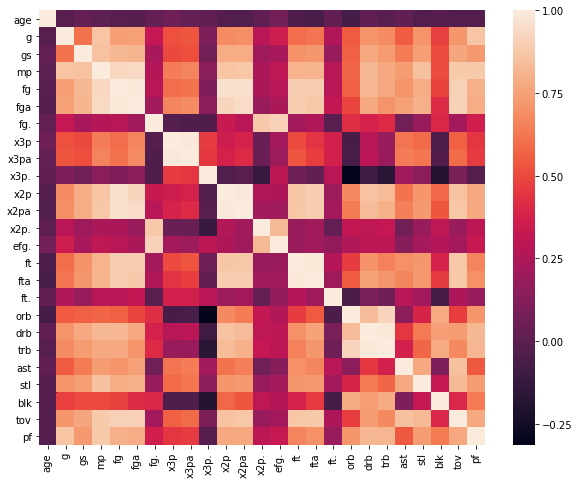

In [13]:
# correlation between attributes
plt.figure(figsize=(10,8))
sns.heatmap(X.corr())

## Normalize the Data

In [14]:
imp = Imputer(missing_values="NaN", strategy='median', axis=0)
X = imp.fit_transform(X)

### Split the data into Train & Test

In [15]:
X_train, X_test, y_train, y_test =  train_test_split(X, y,  train_size=0.75, test_size=0.25, random_state = 100) #75/25 data split

y_train = y_train.as_matrix().ravel()
y_test  = y_test.as_matrix().ravel()


C:\Users\Sreekanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sreekanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


## Model Creation

In [16]:
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=21)
# Fit the model on the training data.
knn.fit(X_train,y_train)
# Make point predictions on the test set using the fit model.
y_pred = knn.predict(X_test)

In [17]:
y_pred

array([ 566.9047619 ,  448.85714286,  156.19047619,  117.23809524,
         25.04761905,  185.66666667,   90.52380952,   77.57142857,
          6.95238095,   24.        ,   57.14285714,  136.04761905,
         89.38095238,   20.14285714,  449.42857143, 1106.04761905,
        341.52380952,  637.38095238,  446.85714286,  643.9047619 ,
         65.57142857, 1358.        , 1142.        ,  832.57142857,
          6.23809524,  591.42857143, 1057.85714286,    6.23809524,
        294.57142857,  185.95238095,  740.76190476,  320.66666667,
        347.52380952, 1043.19047619,  235.66666667,  395.85714286,
        791.42857143,   32.23809524,  115.14285714,  687.14285714,
        526.66666667,  182.61904762,  626.14285714,  214.66666667,
         48.76190476,  434.0952381 ,  111.19047619, 1094.0952381 ,
         10.95238095,  575.76190476, 1164.61904762, 1560.9047619 ,
       1091.19047619,  657.95238095,  757.66666667, 1561.23809524,
        815.71428571,    6.23809524,  628.38095238,  871.61904

In [18]:
y_test

array([ 511,  483,  178,  150,   38,  138,   99,   97,    6,   33,   73,
        107,   99,   26,  429, 1068,  384,  665,  408,  703,   47, 1248,
       1257,  911,    0,  618, 1134,    0,  273,  273,  758,  252,  350,
       1042,  274,  338,  715,   29,  115,  770,  499,  159,  495,  270,
         27,  401,   75, 1095,   12,  579, 1081, 1560, 1069,  677,  646,
       1583,  911,    0,  638,  921,  772,  143,  588, 1007,  280, 1144,
       1107, 1068, 1080,  435,   44,  998,  303,   66,  174, 1226,  520,
        799,    7,    0,  257,   97,  197,   78,  824,  622,  492,  529,
        159,   28,  910,  159, 1249,  339, 1118,  315,  197, 2593,  760,
          3,  378,  485,  532, 1264,  286,  558,  784,  170, 1330,  178,
       1603,   15,  879,  696,  414,   25,  625,  821,    2,  265,  343],
      dtype=int64)

## Mean Square Error

In [19]:
from sklearn.metrics import mean_squared_error
print("[NBA Data] MSE : {}".format(round(mean_squared_error(y_test, y_pred), 3)))

[NBA Data] MSE : 10729.366


### Cross Validation

In [20]:
scores = cross_val_score(knn, X, y, scoring='mean_squared_error', cv = 100,)

C:\Users\Sreekanth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Sreekanth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Sreekanth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Sreekanth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Sreekan

C:\Users\Sreekanth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Sreekanth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Sreekanth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Sreekanth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Sreekan

C:\Users\Sreekanth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Sreekanth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Sreekanth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Sreekanth\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Sreekan

In [21]:
print(scores.mean())

-8478.98734807256


# Scatter plot

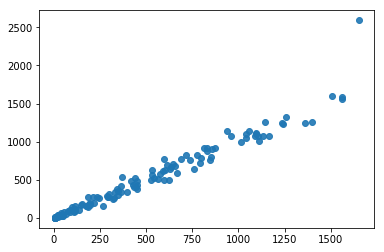

In [22]:
plt.scatter(y_pred, y_test, alpha = 0.9)
plt.show()